# Just how big is the U.S. public pensions crisis?

It is sometimes reported in the news that the U.S. is facing a pensions crisis. How big are these obligations, how quickly are the liabilities growing, and which states have biggest problem?

## Note about pensions vs 401(k)s

This data contains information about pension plans, which are different from 401(k)s.
* 401(k)s can be thought of as pots of money - the employee and the employee make contributions to a pot which is invested. The employee receives the value of the pot on retirement. The value may be big or small depending on whether the investments made big or small returns.   <br><br>
* Pension plans are promises from the employer to the employee which are not linked to a pot of money. The employer promises to pay a pension to the employee when they retire until they die based on a formula - for example:   <br><br>$$\text{Annual pension}=\frac{\text{Number of years worked } x \text{ Salary at retirement}}{60}$$   <br>This formula would mean an employee who had worked for 30 years would be entitled to a pension worth half their annual salary. The employer and the employee still make contributions towards this pension while the employee is working, but the contributions made are not directly linked to size of the employee's pension. If large contributions are made, they are well invested and the employee only lives for a short number of years in retirement, then the contributions made will probably be larger than the pension paid by the employer. However, if the contributions are small, investments perform badly, and / or the employee lives a long time, then the contributions made may not cover the total pension that must be paid by the employer until the employee dies. It is up to the employer to cover the difference.

Formula-based pensions have begun to cause problems in recent years, partly because people are living much longer than expected when these pensions were introduced. This means that the contributions made over the last 30 years or so were not enough to pay for the pensions which are now due. Formula-based pensions, or pension plans, are common in the public sector and this is where some of the biggest problems now lie. 

## The data

The data I am using comes from [Kaggle](https://www.kaggle.com/meepbobeep/us-public-pensions-data-fiscal-years-20012016/version/6#PPD_PlanLevel.csv). The dataset covers 95% of public pension plan memberships and assets nationwide and provides a large amount of information on 180 pension schemes for the fiscal years from 2001 to 2017. The data originally came from [publicplansdata.org](publicplansdata.org) which is maintained by several organizations including the Center for Retirement Research at Boston College. 

## Exploring the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pensions = pd.read_csv("~/Documents/Thinkful/Unit4/PPD_PlanLevel.csv.zip", compression = 'zip')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<i><b>Amount of data held</b></i>

The dataset contains information on 180 different pension schemes over 17 years. The graph below shows that the dataset contains information for all 17 years for the vast majority of the pension schemes.

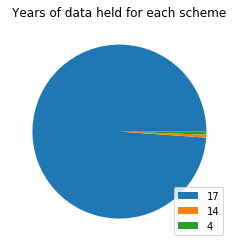

In [3]:
num_yrs = pensions.PlanName.value_counts()
count_num_yrs = num_yrs.value_counts()
num_labels = list(count_num_yrs.index)
plt.pie(count_num_yrs)
plt.title("Years of data held for each scheme")
plt.legend(num_labels, loc='lower right')
plt.show()

<i><b>Number of public pension schemes by state</b></i>

The data breaks down the pension schemes by state. The graph below shows the number of pension schemes in the data attributable to each state for the most recent year, 2017.

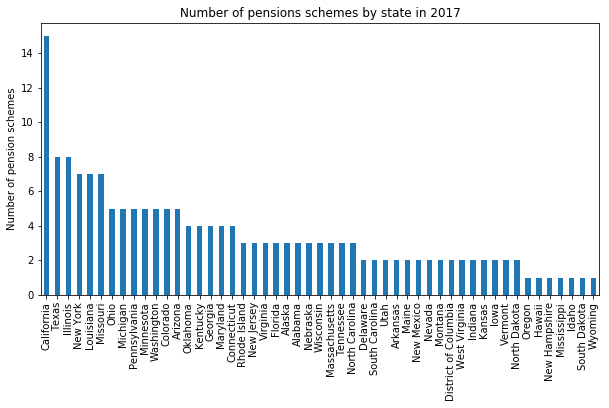

In [4]:
pensions_2017 = pensions.loc[pensions['fy'] == 2017,]
pensions_2017['StateName'].value_counts().plot(kind='bar', figsize=(10,5))
plt.ylabel("Number of pension schemes")
plt.title("Number of pensions schemes by state in 2017")
plt.show()

<i><b>Change in size of pension schemes</b></i>

The size of each pension scheme can be judged by the ActLiabilities_GASB variable. This variable indicates the total size of the future pension obligations owed by each pension scheme as reported in its financial accounts. It is recalculated every year to take account of new liabilities and changes in economic assumptions. The graph below shows how the range of liabilities for all pension schemes has changed between 2001 and 2017.

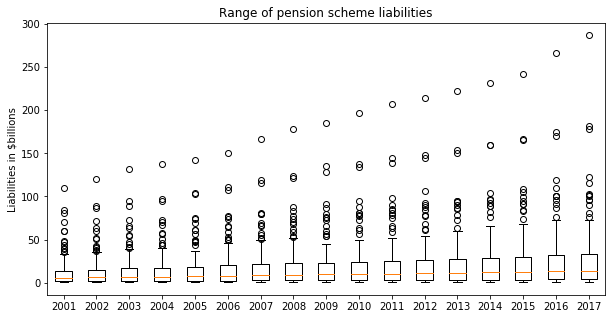

In [5]:
liabilities = pensions.loc[:, ['PlanName', 'fy', 'ActLiabilities_GASB']]
liabilities['ActLiabilities_GASB'] = liabilities['ActLiabilities_GASB'] / 1000000 # Change to billions, originally in thousands
liabilities_2 = liabilities.pivot(index='PlanName', columns='fy', values='ActLiabilities_GASB')
liabilities_2.dropna(inplace=True)
liabilities_3 = liabilities_2.T
liability_yrs = list(liabilities_3.index)

plt.figure(figsize=(10, 5))
plt.boxplot(liabilities_3)
plt.ylabel("Liabilities in $billions")
plt.title("Range of pension scheme liabilities")
plt.xticks(range(1, 18), liability_yrs)
plt.show()

The boxplots show that the range of liabilities has grown over 17 years, and the largest single liability has almost doubled (though from this graph we cannot be 100% certain this is the same scheme each year). There is also significant skew in the data. For example, in 2017, half the schemes had liabilities below around \\$20 billion, but the other half had a significantly larger range of liabilities, up to around \\$286 billion. 

<i><b>Funded ratios</b></i>

It is not just that the size of the schemes, in terms of the obligations owed, have got larger. Over the same period of time the funded ratios have dropped, meaning that the schemes hold a smaller proportion of assets to back the liabilities in 2017 compared to 2001.

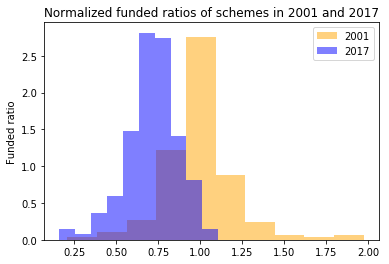

In [6]:
pensions_2001 = pensions[pensions['fy'] == 2001]
pensions_2017 = pensions.loc[pensions['fy'] == 2017,]

plt.hist(pensions_2001.dropna(subset=['ActFundedRatio_GASB'])['ActFundedRatio_GASB'], color='orange', alpha=.5, density=True)
plt.hist(pensions_2017.dropna(subset=['ActFundedRatio_GASB'])['ActFundedRatio_GASB'], color='blue', alpha=0.5, density=True)
plt.title("Normalized funded ratios of schemes in 2001 and 2017")
plt.legend(["2001", "2017"])
plt.ylabel("Funded ratio")
plt.show()

## Analytic Questions

<i><b>1. How big is the pensions problem?</b></i> <br><br>
The pensions crisis has come about because of the size of the <i>unfunded</i> pension liabilities. In other words, pension schemes are usually sustainable as long as the amount of assets held by the scheme roughly matches the size of the liabilities.

To see how big the pensions problem is I need to calculate the total size of the unfunded liabilities over time. To make sure it is a fair comparison it is important to make sure that the same pension schemes are included in all years, and any schemes with data missing for one year are excluded.

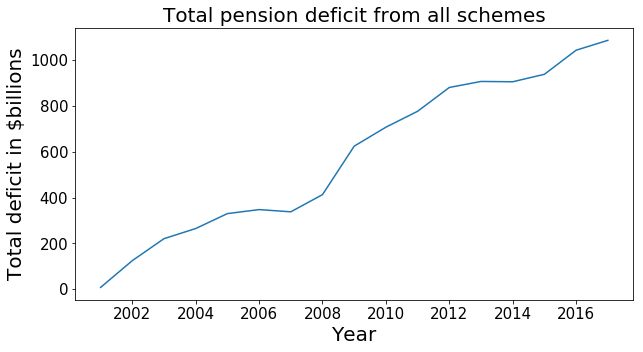

In [7]:
deficits = pensions.loc[:, ['PlanName', 'fy', 'StateAbbrev', 'UAAL_GASB']]
deficits_2 = deficits.pivot(index='PlanName', columns='fy', values='UAAL_GASB')
deficits_2.dropna(inplace=True)
deficits_2.loc['Total'] = deficits_2.sum()
deficits_2 = deficits_2.T

plt.figure(figsize=(10, 5))
plt.plot(deficits_2.Total / 1000000) # Convert to billions (in thousands)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total deficit in $billions", fontsize=20)
plt.title("Total pension deficit from all schemes", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Proportion of schemes included in this graph:

In [8]:
(len(deficits_2.columns) - 1) / 180 ## Remove "Total" column from count and divide by original number of schemes

0.7555555555555555

This graph suggests that the answer to the question is probably "It's a pretty big problem - and it's growing!". As of 2017 the total unfunded pension liabilities were just over $1 trillion. This is approximately double what it was in 2008. It should also be remembered that this is a low-ball estimate because I excluded schemes which did not have data for every year, and the dataset only contained 95% of schemes in the first place.

<i><b>2. Which states have seen the largest increases in liabilities?</b></i>

To answer this question I need to calculate the total liabilities in each state in 2001 and 2017. To make sure it is a fair comparison it is important to make sure that the same pension schemes are included in both years, and any schemes with data in only one year are excluded.

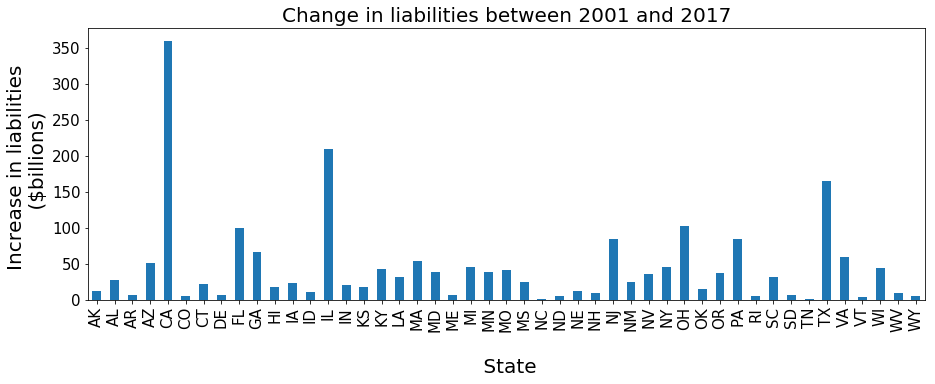

In [9]:
# Slice out the years required
years = [2001, 2017]
pensions_01_17 = pensions[pensions.fy.isin(years)]

# Remove schemes which do not have data for one or both years
pensions_01_17 = pensions_01_17.dropna(subset = ['ActLiabilities_GASB'])
counts = pd.DataFrame(pensions_01_17.PlanName.value_counts())
in_both = counts[counts['PlanName'] > 1]
in_both_list = list(in_both.index)
pensions_01_17 = pensions_01_17[pensions_01_17.PlanName.isin(in_both_list)]

# Reshape data to make comparisons between years easier
pensions_01 = pensions_01_17[pensions_01_17['fy'] == 2001]
pensions_17 = pensions_01_17[pensions_01_17['fy'] == 2017]
liabs_01 = pd.DataFrame(pensions_01.groupby('StateAbbrev')['ActLiabilities_GASB'].sum())
liabs_17 = pd.DataFrame(pensions_17.groupby('StateAbbrev')['ActLiabilities_GASB'].sum())
liabs_01_17 = pd.DataFrame(index = liabs_01.index)
liabs_01_17['Liabs_2001'] = liabs_01['ActLiabilities_GASB'] / 1000000 #Change to billions
liabs_01_17['Liabs_2017'] = liabs_17['ActLiabilities_GASB'] / 1000000 #Originally in thousands

# Find change in liabilities and plot
liabs_01_17['Liabs_change'] = liabs_01_17['Liabs_2017'] - liabs_01_17['Liabs_2001']
liabs_01_17.Liabs_change.plot(kind='bar', figsize=(15,5))
plt.title("Change in liabilities between 2001 and 2017", fontsize=20)
plt.ylabel("Increase in liabilities \n ($billions)", fontsize=20)
plt.xlabel("\n State", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The three states to have seen the largest increase in liability amounts are California, Illinois and Texas. These are the same three states with largest number of pension schemes in 2017, so this is perhaps not particularly surprising. Of the next largest, Florida may be a cause for concern as it has seen the 5th largest increase over this time, but it only has 3 pension schemes (18 states have a larger number of schemes). To see whether there are any other states with similar concerns the graph below shows the increase in liabilities per scheme in each state.

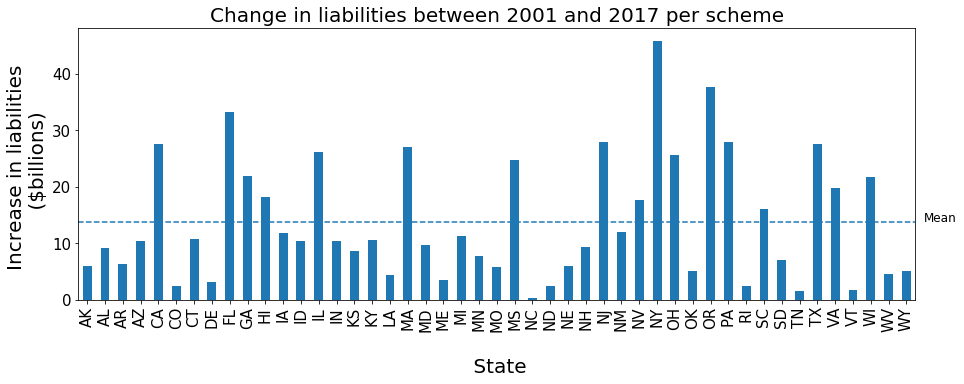

In [10]:
num_schemes = pd.DataFrame(pensions_17.StateAbbrev.value_counts())
num_schemes.sort_index(inplace=True)
liabs_01_17['Num_schemes'] = num_schemes['StateAbbrev']
liabs_01_17['Change_per_scheme'] = liabs_01_17['Liabs_change'] / liabs_01_17['Num_schemes']

liabs_01_17.Change_per_scheme.plot(kind='bar', figsize=(15,5))
plt.title("Change in liabilities between 2001 and 2017 per scheme", fontsize=20)
plt.ylabel("Increase in liabilities \n ($billions)", fontsize=20)
plt.xlabel("\n State", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(liabs_01_17.Change_per_scheme.mean(), linestyle='dashed')
plt.text(47, liabs_01_17.Change_per_scheme.mean(), "Mean", fontsize=12)
plt.show()

Though California, Illinois and Texas have experienced above average increases per scheme to their pension liability sizes, they are not the states to have seen the biggest increases per scheme - these are New York, Oregon and Florida.

<i><b>3. Do the pension schemes with the biggest liabilities have the worst funded ratios?</b></i>

This question attempts to indicate how much trouble different pension schemes are in. Huge pension liabilities will probably be manageable if the schemes hold enough assets to pay these pensions. Schemes that have funded ratios under 1 do not currently have enough assets to pay their obligations, and the bigger these schemes are, the bigger the problem is.

In [11]:
pensions_2017_clean = pensions_2017.dropna(subset=['ActLiabilities_GASB'])
pensions_2017_clean['ActLiabilities_GASB'] = pensions_2017_clean['ActLiabilities_GASB'] / 1000000 # Convert to billions

# Check no NAs in funded ratio column
pen_check = pensions_2017_clean.dropna(subset=['ActFundedRatio_GASB'])
len(pensions_2017_clean) == len(pen_check)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


True

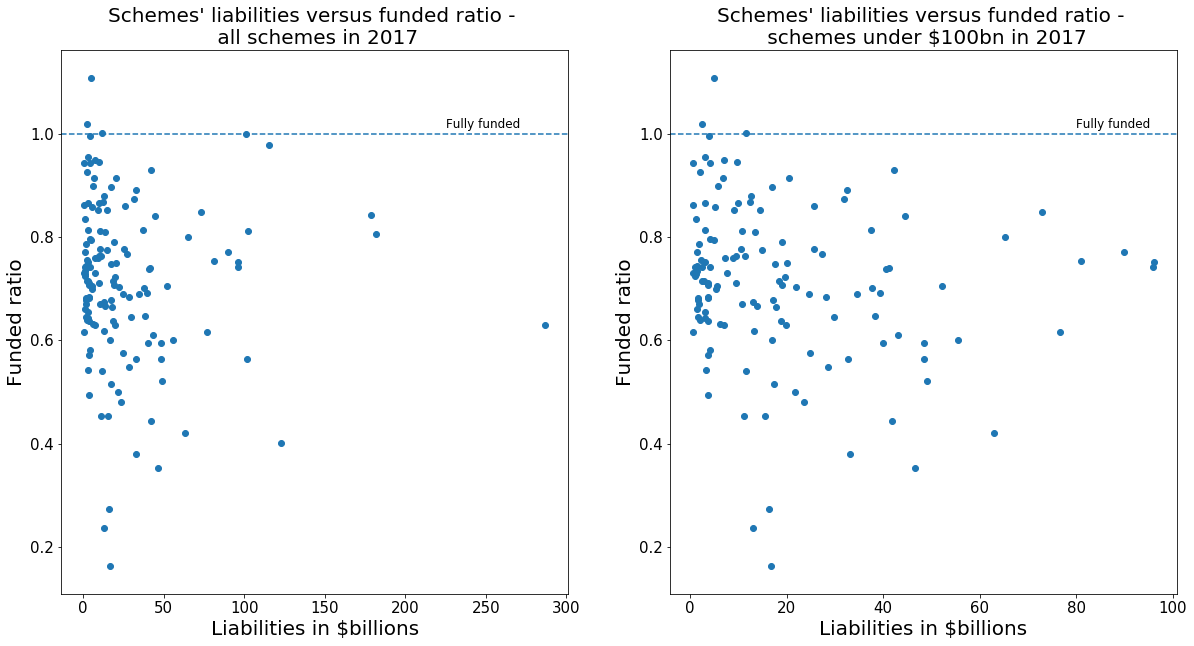

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.scatter(x=pensions_2017_clean['ActLiabilities_GASB'], y=pensions_2017_clean['ActFundedRatio_GASB'])
plt.xlabel("Liabilities in $billions", fontsize=20)
plt.ylabel("Funded ratio", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Schemes' liabilities versus funded ratio - \n all schemes in 2017", fontsize=20)
plt.axhline(1, linestyle='dashed')
plt.text(225, 1.01, "Fully funded", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(x=pensions_2017_clean[pensions_2017_clean['ActLiabilities_GASB'] < 100]['ActLiabilities_GASB'], y=pensions_2017_clean[pensions_2017_clean['ActLiabilities_GASB'] < 100]['ActFundedRatio_GASB'])
plt.xlabel("Liabilities in $billions", fontsize=20)
plt.ylabel("Funded ratio", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Schemes' liabilities versus funded ratio - \n schemes under $100bn in 2017", fontsize=20)
plt.axhline(1, linestyle='dashed')
plt.text(80, 1.01, "Fully funded", fontsize=12)

plt.show()

We can see that only a tiny minority of schemes are fully funded (i.e. have funded ratios over 1) - the majority of schemes do not have enough assets to cover their liabilities.

There is no discernable trend relating size of a scheme's liabilities to its funded ratio. This is the case even when the largest schemes are excluded, allowing us to zoom in on the smaller schemes. The answer to my question is therefore no, there is no obvious relationship between size of the pension liabilities and funded ratio. However, we can conclude that almost all schemes are underfunded.

## Further research (incomplete section)

Further research projects could focus on finding predictors for significant deteriorations in funded status.

Predicting the overall funded ratio is a complex mix of asset variables (investment returns on different assets, expenses) and liability variables (number of employees, size of salary, life expectancy). However, it may be possible to find risk factors which significantly increase the likelihood of the funded ratio dropping by a certain amount. 

A potential research question could be: <b> Can we predict which pension schemes are likely to see a drop in their funded ratio of at least 10% in the next year?</b>

Because this would test a lot of factors (e.g. investment strategy, investment expenses, advisor expenses, average salary of employee etc) it would important to allow for statistical significance correctly.

A clustering technique might be appropriate for identifying common factors between different schemes. 


Another further research project would cross-reference this dataset with population and taxpayer data. I would then model how large the pensions problem might be in each state in future depending on its future population. This could be done in two ways:

* The model takes a fixed population as an input and the result is calculated for a range of different possible populations.

* Future population is modeled separately including error bands. This data is fed into the pension liability model, creating a single result with error bands.

Potential research questions could include: <b>
- How are public pension liabilities expected to change in future in California given expected population changes?
- How are public pension funded ratios expected to change in future in California given expected population changes?
- Are California taxpayers going to have to contribute to the public pension schemes and if so, when?</b>

This would be interesting because the population changes would affect the pension problem in two ways. Firstly, a larger population means that more people are likely to work in the public sector, thus increasing the pension liabilities. Secondly, a larger population would likely result in higher tax income, thus reducing the risk of financial problems. The model could assess how these two effects interact.

Other ideas:

* Can investment returns be predicted by investment strategy? 
* Can funded ratios be predicted by investment strategy? 
* How would the funded ratios of public pension schemes change if all public pension schemes were closed to new members immediately?
* How would the funded ratios of public pension schemes be affected in another financial crash?